# Planets dataset from data science handbook

In [4]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset('planets')
print(df.shape)
df.head()

(1035, 6)


,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


Show number of planets discovered by each methods in each decade

In [12]:
decade = (df.year // 10) * 10
decade = decade.astype('str') + 's'

df.groupby(['method', decade]).number.sum().unstack().fillna(0)

year,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


Loop over groupbs and use nice formatting

In [28]:
for (method, data) in df.groupby('method'):
    print(f'{method:35}{data.shape}')

Astrometry                         (2, 6)
Eclipse Timing Variations          (9, 6)
Imaging                            (38, 6)
Microlensing                       (23, 6)
Orbital Brightness Modulation      (3, 6)
Pulsar Timing                      (5, 6)
Pulsation Timing Variations        (1, 6)
Radial Velocity                    (553, 6)
Transit                            (397, 6)
Transit Timing Variations          (4, 6)


# Titanic survivors

In [30]:
tit = sns.load_dataset('titanic')
print(tit.shape)
tit.head()

(891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [37]:
tit.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [47]:
age = pd.cut(tit.age, [0, 18, 100])
fare = pd.qcut(tit.fare, 2)

tit.pivot_table('survived', index=['sex', age], columns=['class', fare])

class                       First                             Second  \
fare             (-0.001, 14.454] (14.454, 512.329] (-0.001, 14.454]   
sex    age                                                             
female (0, 18]                NaN          0.909091         1.000000   
       (18, 100]              NaN          0.972973         0.880000   
male   (0, 18]                NaN          0.800000         0.000000   
       (18, 100]              0.0          0.391304         0.098039   

class                                         Third                    
fare             (14.454, 512.329] (-0.001, 14.454] (14.454, 512.329]  
sex    age                                                             
female (0, 18]            1.000000         0.714286          0.318182  
       (18, 100]          0.914286         0.444444          0.391304  
male   (0, 18]            0.818182         0.260870          0.178571  
       (18, 100]          0.030303         0.125000          0.192308

# US birth rate data 

In [69]:
import seaborn as sns
sns.set()
sns.set_style('white')

df = pd.read_csv('./data/births.csv')
print(df.shape)
df.head()

(15547, 5)


,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


Number of birhts per year by gender

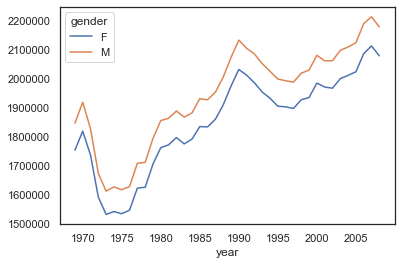

In [70]:
df.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot();

Number of births per day of week

In [76]:
df.index = pd.to_datetime(df.year*10000 + df.month*100 + df.day, format='%Y%m%d')
df

ValueError: unconverted data remains: 9